# Scraping Coursera

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
url = "https://www.coursera.org/courses?page=1&index=prod_all_products_term_optimization"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
# Find the <h3> element with class "cds-CommonCard-title" which contains the course name
course_name_elements = soup.find_all('h3', class_='cds-CommonCard-title')

for course_name_element in course_name_elements:
    course_name = course_name_element.text
    print(course_name)



Google Cybersecurity
Google Data Analytics
Google Project Management:
Google IT Support
IBM Data Science
Google UX Design
IBM Data Analyst
Google Digital Marketing & E-commerce
Machine Learning
Introduction to Data Science
IBM DevOps and Software Engineering
Data Science Fundamentals with Python and SQL


In [ ]:
# doup ==soup
doup.find_all('h3', class_='cds-CommonCard-title') ==[]

True

In [ ]:

provider_elements = soup.find_all('p', class_='cds-ProductCard-partnerNames')

for provider_element in provider_elements:
    provider_name = provider_element.text
    print(provider_name)

Google
Google
Google
Google
IBM
Google
IBM
Google
Multiple educators
IBM
IBM
IBM


In [ ]:
p_element = soup.find_all('p', class_='css-11uuo4b')

for provider_element in p_element:
    provider_name = provider_element.text
    print(provider_name)


4.8
4.8
4.8
4.8
4.6
4.8
4.6
4.8
4.9
4.6
4.6
4.5


In [ ]:
p_elements = soup.find_all(class_='css-pn23ng')

for provider_element in p_elements:
    provider_text = provider_element.text
    review_start = provider_text.find("(")
    review_end = provider_text.find(")")
    if review_start != -1 and review_end != -1:
        review_text = provider_text[review_start + 1:review_end]
        print(review_text)

7.1k reviews
122.2k reviews
89k reviews
113.9k reviews
174.7k reviews
68.1k reviews
67.2k reviews
17.2k reviews
14.1k reviews
82k reviews
40.6k reviews
56.7k reviews


In [ ]:
p_elements = soup.find_all('p', class_="css-dmxkm1")
difficulty_list = []
course_type_list = []
duration_list = []

for provider_element in p_elements:
    provider_name = provider_element.text

    if "·" in provider_name:
        parts = provider_name.split("·")
        difficulty = parts[0].strip()
        course_info = parts[1].strip()
        duration = parts[2].strip()

        if "Credit Eligible" in difficulty:
            difficulty = difficulty.replace("Credit Eligible", "")
        difficulty_list.append(difficulty)
        course_type_list.append(course_type)
        duration_list.append(duration)

print("Difficulty:", difficulty_list)
print("Course Type:", course_type_list)
print("Duration:", duration_list)


Difficulty: ['Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner', 'Beginner']
Course Type: ['Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization', 'Specialization']
Duration: ['3 - 6 Months', '3 - 6 Months', '3 - 6 Months', '3 - 6 Months', '3 - 6 Months', '3 - 6 Months', '3 - 6 Months', '3 - 6 Months', '1 - 3 Months', '3 - 6 Months', '3 - 6 Months', '3 - 6 Months']


In [ ]:
def auto_Scrapper(course_case,providers,ratings, reviews,difficulty_list,course_type_list,duration_list,doup):
    for i in range(1, 42):
        url = "https://www.coursera.org/courses?page=" + str(i) + "&index=prod_all_products_term_optimization"
        soup = doup
        while soup.find_all('h3', class_='cds-CommonCard-title') ==[]:
          page = requests.get(url)
          soup = BeautifulSoup(page.content, 'html.parser')
        course_name_elements = soup.find_all('h3', class_='cds-CommonCard-title')
        provider_elements = soup.find_all('p', class_='cds-ProductCard-partnerNames')
        p_element = soup.find_all('p', class_='css-11uuo4b')
        p_elements = soup.find_all(class_='css-pn23ng')

        for course_name_element in course_name_elements:
            course_name = course_name_element.text
            course_case.append(course_name)

        for provider_element in provider_elements:
            provider_name = provider_element.text
            providers.append(provider_name)

        for provider_element in p_element:
            provider_name = provider_element.text
            ratings.append(provider_name)

        for provider_element in p_elements:
            provider_text = provider_element.text
            review_start = provider_text.find("(")
            review_end = provider_text.find(")")
            if review_start != -1 and review_end != -1:
                review_text = provider_text[review_start + 1:review_end]
                reviews.append(review_text)

        p_elements = soup.find_all('p', class_="css-dmxkm1")
        for provider_element in p_elements:
          provider_name = provider_element.text

          if "·" in provider_name:
              parts = provider_name.split("·")
              difficulty = parts[0].strip()
              course_info = parts[1].strip()
              duration = parts[2].strip()

              if "Credit Eligible" in difficulty:
                  difficulty = difficulty.replace("Credit Eligible", "")
              difficulty_list.append(difficulty)
              course_type_list.append(course_type)
              duration_list.append(duration)


In [ ]:
course_title =[]
pr = []
rat = []
rev = []
diff = []
typ = []
dur = []
auto_Scrapper(course_title,pr,rat,rev,diff,typ,dur,doup)
for i in [course_title,pr,rat,rev,diff,typ,dur]:
  print(len(i))

492
492
492
492
492
492
492


In [ ]:

data = {
    "Course Name": course_title,
    "Provider": pr,
    "Rating": rat,
    "Reviews":rev,
    "Level":diff,
    "Type":typ,
    "Duration":dur
}
dataset = pd.DataFrame(data)

In [ ]:
dataset.head()

,Course Name,Provider,Rating,Reviews,Level,Type,Duration
0,Google Cybersecurity,Google,4.8,7.3k reviews,Beginner,Specialization,3 - 6 Months
1,Google Data Analytics,Google,4.8,122.5k reviews,Beginner,Specialization,3 - 6 Months
2,Google Project Management:,Google,4.8,89.2k reviews,Beginner,Specialization,3 - 6 Months
3,Google IT Support,Google,4.8,174.8k reviews,Beginner,Specialization,3 - 6 Months
4,IBM Data Science,IBM,4.6,113.9k reviews,Beginner,Specialization,3 - 6 Months


In [ ]:
# dataset.to_excel('Courses.xlsx')

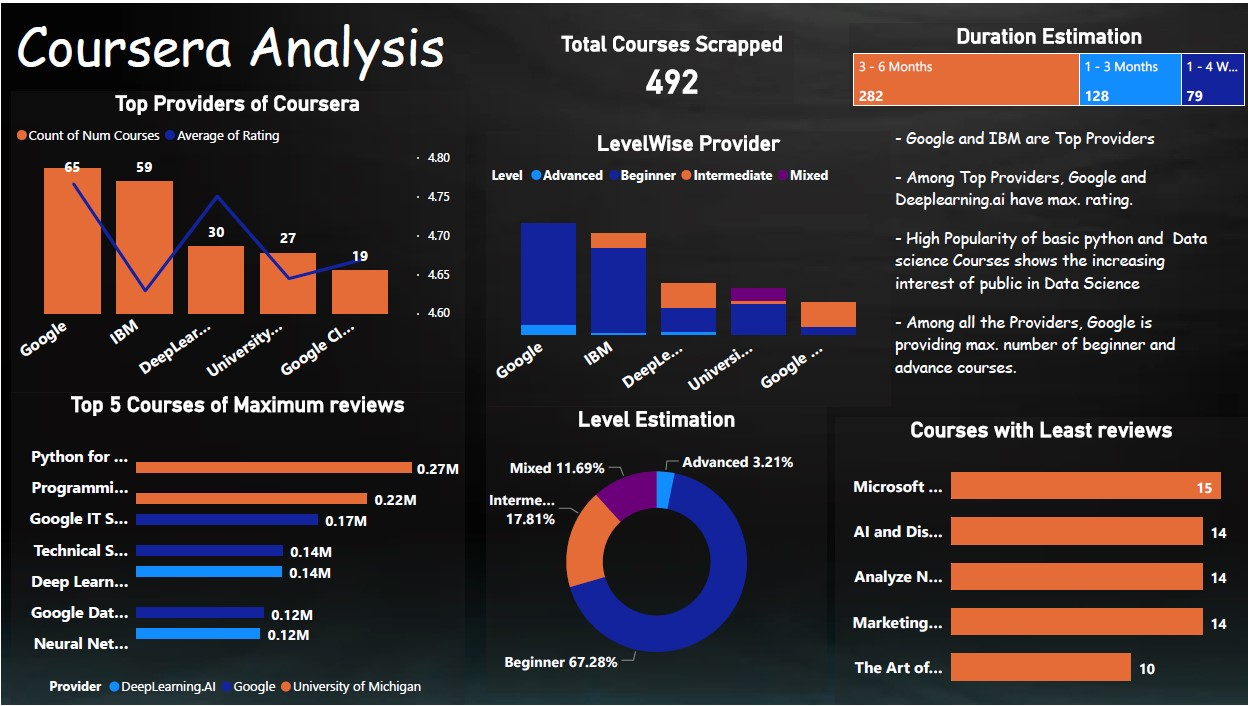

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('Coursera DataAnalysis PowerBi.jpg')
img